# Files

In [1]:
! ls | grep csv

big-df-by-expt.csv
big-df-by-expt-with-stab.csv
big-df-by-roi.csv
control-mse.csv
creb-mse.csv
csv_backup
decode-mse-10k.csv
decode-mse-50-100-500-1000.csv
df-by-expt-RF-SUP-DEEP.csv
fig-list.csv
old_csvs


In [2]:
! ls | grep pkl

day3-sess3-reward-rois.pkl
stability-just-pf-corr-PCboth-for-expt-objects.pkl
stability-just-pf-corr-PCeither-for-expt-objects.pkl
STABILITY-PCBOTH-DAY-SESSION-WITH-SHUFFLE-BY-ROI.pkl
STABILITY-PCBOTH-DAY-SESSION-WITH-SHUFFLE.pkl


# Import

In [1]:
# expt variables
channel=creb.CHANNEL
label=creb.IMAGING_LABEL

# styles 
markers=creb.markers
linestyles=creb.linestyles

# labels 
group_labels=creb.labels
GCAMP_label=creb.labels[0]
CREB_label=creb.labels[1]
DN_label=creb.labels[2]

# colors 
colors = creb.colors
GCAMP_color=creb.colors[0]
CREB_color=creb.colors[1]
DN_color=creb.colors[2]

# set seaborn pallette
sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

# stats
%load_ext rpy2.ipython

In [4]:
# 2.2 notebook

# just for pcse
import sys
sys.path.insert(0, '/home/matt/code/analysis/analysis-scripts')
import place_cell_data_save_expt as pcse
import place_cell_data_save as pcs

In [30]:
# variables + functions
activity_labels=['Number of place fields',
      'Place field width',
      'Specificity',
      'Sensitivity',
      'Sparsity',
       'Place cell Fraction',
       'Spatial information',
       'Circular variance']

keys=['n_place_fields',
      'pf_width',
      'specificity',
      'sensitivity',
      'sparsity',
      'pc_percentage',
       'spatial_information_pc',
       'circular_variance_pc']

## single calc

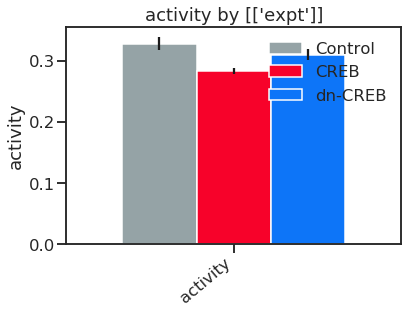

In [52]:
fig,ax = plt.subplots(1)
d['circ_var'] = plot_metric( ax=ax, exptGrps=exptGrps, roi_filters=roi_filters,
                metric_fn=place.circular_variance, plot_method='grouped_bar',
                groupby=[['expt']], plotby=None, activity_kwargs={})

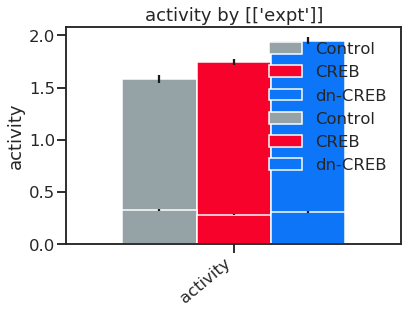

In [24]:
d={}
fig,ax = plt.subplots(1)
d['si'] = plot_metric( ax=ax, exptGrps=exptGrps, roi_filters=roi_filters,
                metric_fn=place.spatial_information, plot_method='grouped_bar',
                groupby=[['expt']], plotby=None, activity_kwargs={})
d['cv'] = plot_metric( ax=ax, exptGrps=exptGrps, roi_filters=roi_filters,
                metric_fn=place.circular_variance, plot_method='grouped_bar',
                groupby=[['expt']], plotby=None, activity_kwargs={})

# Load groups

In [20]:
exptGrps,roi_filters = creb.load_creb_experiments(filter_type='place')

LOADED EXPERIMENT GROUPS: CREB,dn-CREB,Control
Using filter...place


# do big df calculations (does not need repeating)

Replicates some of the helper notebook here

In [17]:
# by expt
df_expt = pcs.save_data(exptGrps,roi_filters=roi_filters)
df_expt = mjdplot.attrib_to_df(df_expt)
df_expt.to_csv('big-df-by-expt.csv')

sensitivity
specificity
sparsity
pf_width
trans_auc
trans_amplitude
trans_duration
trans_frequency
trans_auc_nr
trans_amplitude_nr
trans_duration_nr
trans_frequency_nr
trans_auc_all
trans_amplitude_all
trans_duration_all
trans_frequency_all
circ_var
circ_var_p
spatial_information
n_place_fields
fraction_near_rads_8
fraction_near_norm_05
fraction_near_norm_10
lick_reward_fraction
anticipatory_licking
activity_centroid_reward_distance
centroid_reward_distance


In [38]:
# by roi
df_roi = pcs.save_data(exptGrps,roi_filters=roi_filters)
df_roi = mjdplot.attrib_to_df(df_roi)

df_roi.drop(list(df_roi.filter(regex = 'mouse')), axis = 1, inplace = True)
df_roi.drop(list(df_roi.filter(regex = 'closest_position')), axis = 1, inplace = True)
df_roi = mjdplot.roi_to_label(df_roi)

df_roi.to_csv('big-df-by-roi.csv')

# CSV

In [11]:
# df = pd.read_csv('big-df-by-roi.csv') # by roi
df = pd.read_csv('big-df-by-expt.csv') # by expt

df.drop(df.query('trial_id == 12813').index,inplace=True) # filter bad tial

print(df.shape)
print(df.columns.values)

(267, 38)
['Unnamed: 0' 'sensitivity' 'grp' 'specificity' 'sparsity' 'pf_width'
 'trans_auc' 'trans_amplitude' 'trans_duration' 'trans_frequency'
 'trans_auc_nr' 'trans_amplitude_nr' 'trans_duration_nr'
 'trans_frequency_nr' 'trans_auc_all' 'trans_amplitude_all'
 'trans_duration_all' 'trans_frequency_all' 'circ_var' 'circ_var_p'
 'spatial_information' 'n_place_fields' 'fraction_near_rads_8'
 'fraction_near_norm_05' 'fraction_near_norm_10' 'lick_reward_fraction'
 'anticipatory_licking' 'activity_centroid_reward_distance'
 'centroid_reward_distance' 'trial_id' 'condition' 'day' 'session'
 'experimentType' 'startTime' 'mouseID' 'session_day' 'pc_percentage']


In [28]:
# save csv
df.to_csv('big-df-by-expt.csv')

# Auto figs

## by roi

/home/matt/code/analysis/lab/analysis/place_cell_analysis.py:183: UserWarning: Sensitivity not calculated for pf width >0.5: 51 pfs skipped
  '{} pfs skipped'.format(n_wide_pfs))
/home/matt/code/analysis/lab/analysis/place_cell_analysis.py:183: UserWarning: Sensitivity not calculated for pf width >0.5: 95 pfs skipped
  '{} pfs skipped'.format(n_wide_pfs))
/home/matt/code/analysis/lab/analysis/place_cell_analysis.py:183: UserWarning: Sensitivity not calculated for pf width >0.5: 32 pfs skipped
  '{} pfs skipped'.format(n_wide_pfs))


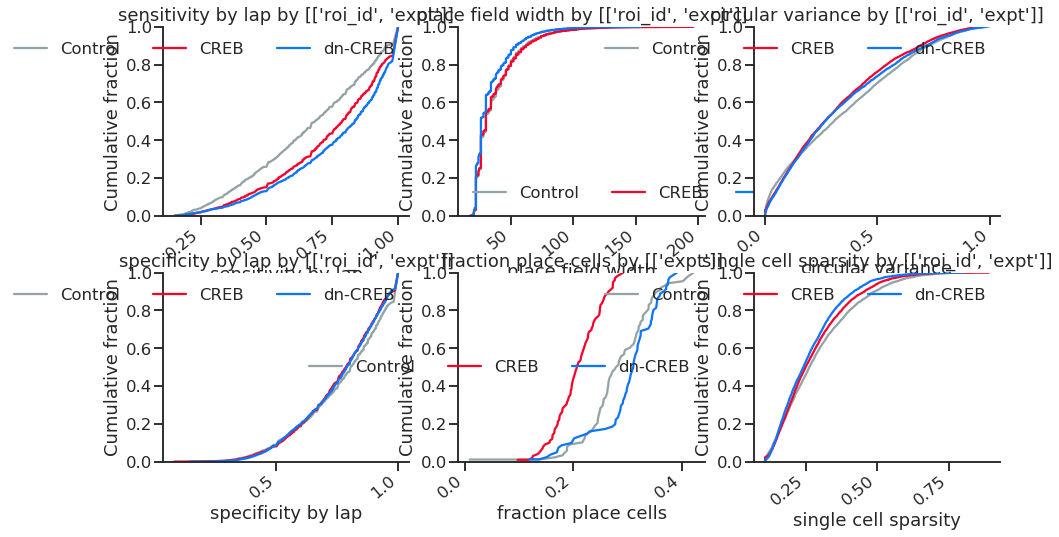

In [3]:
#%matplotlib notebook
#CDF
#For hist: uniform_bins=True, normed=True, plot_mean=True
pcf.plotPlaceFieldStatSummary(
        exptGrps, roi_filters=roi_filters, plot_method='cdf',
        groupby=[['roi_id', 'expt']], plotby=None, save_data=False,
        rasterized=False,colors=colors)
plt.show()

## by expt

/home/matt/code/analysis/lab/analysis/place_cell_analysis.py:183: UserWarning: Sensitivity not calculated for pf width >0.5: 51 pfs skipped
  '{} pfs skipped'.format(n_wide_pfs))
/home/matt/code/analysis/lab/analysis/place_cell_analysis.py:183: UserWarning: Sensitivity not calculated for pf width >0.5: 95 pfs skipped
  '{} pfs skipped'.format(n_wide_pfs))
/home/matt/code/analysis/lab/analysis/place_cell_analysis.py:183: UserWarning: Sensitivity not calculated for pf width >0.5: 32 pfs skipped
  '{} pfs skipped'.format(n_wide_pfs))


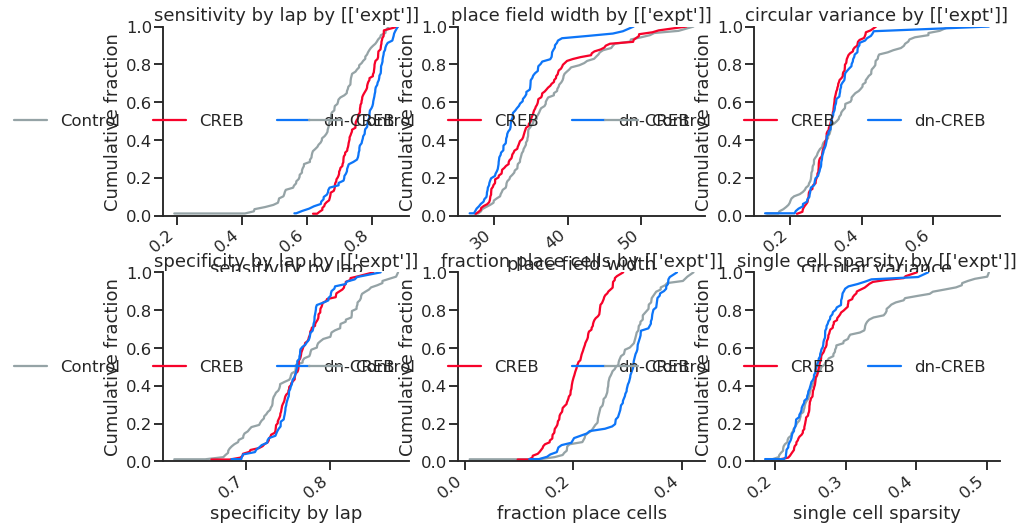

In [36]:
import lab.figures.place_cell_figures as pcf
#%matplotlib notebook
#CDF
#For hist: uniform_bins=True, normed=True, plot_mean=True
pcf.plotPlaceFieldStatSummary(
        exptGrps, roi_filters=roi_filters, plot_method='cdf',
        groupby=[['expt']], plotby=None, save_data=False,
        rasterized=False,colors=colors)
plt.show()

# Generate data

## single metric

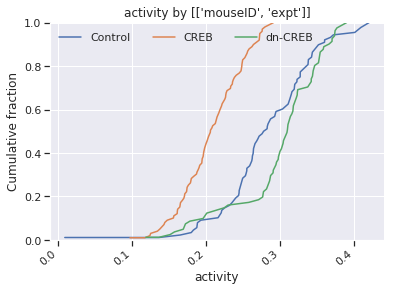

In [26]:
# single metric

data2={}
fig,ax = plt.subplots(1)

groupby = [['mouseID','expt']]
keys=['pc_percentage']
metrics={'pc_percentage': place.place_cell_percentage}
activity_kwargs= {'pc_percentage': None}

for key in keys:

    data2[key]=plot_metric(
            ax=ax, exptGrps=exptGrps, roi_filters=roi_filters,
            metric_fn=metrics[key], plot_method='cdf',
            groupby=groupby, plotby=None, activity_kwargs=activity_kwargs[key])

## merge new value into df 1

In [ ]:
# when forgot to calculate a value, merge in to the csv
dfs=mjdplot.attrib_to_df(stats.prep_data(data2["pc_percentage"])).rename(columns={'value':'pc_percentage'})
dfsa=dfs[["pc_percentage","trial_id"]]
dfsa["trial_id"] = dfsa.trial_id.astype('int')
df = pd.merge(df,dfsa,on="trial_id")

## merge new value into df 2 (pc of spatial info)

In [26]:
# get new calculated metric in e.g. d['si']

new_col = "circular_variance_pc"

dd = stats.prep_data(d['cv'])
dd = mjdplot.attrib_to_df(dd).reset_index()
dd.rename(columns = {'value': new_col},inplace=True)
dd["trial_id"] = dd.trial_id.astype('int64')

# merge with big df 
df = pd.merge(df,dd.loc[:,[new_col,"trial_id"]],on="trial_id")

## all metrics

In [ ]:
# all metrics

data={}
groupby = [['mouseID','expt',]]
fig,ax = plt.subplots(1)


keys=['n_pfs',
      'width',
      'specificity',
      'sensitivity',
      'sparsity']

metrics={'n_pfs': place.n_place_fields,
         'width': place.place_field_width,
         'specificity': place.specificity,
         'sensitivity':place.sensitivity,
         'sparsity':place.sparsity}

activity_kwargs= {'n_pfs': {'per_mouse_fractions': False, 'max_n_place_fields': 3,},
                  'width': None,
                  'specificity': None,
                  'sensitivity': None,
                  'sparsity': None}
keys=['n_pfs',
      'width',
      'specificity',
      'sensitivity',
      'sparsity']

for key in keys:
    data[key]=plot_metric(
            ax=ax, exptGrps=exptGrps, roi_filters=roi_filters,
            metric_fn=metrics[key], plot_method='grouped_bar',
            groupby=groupby, plotby=None, activity_kwargs=activity_kwargs[key])

## merge activity and pc (old way, overriden by big csv)

In [ ]:
# old 
for key in keys:
    dfs.append(mjdplot.prep_for_merge(data,key))
    
df_place = reduce(lambda  left,right: mjdplot.merge_pairs(left,right), dfs)

df_merged=mjdplot.attrib_to_df(df_merged)

# Plot all metrics

## lines

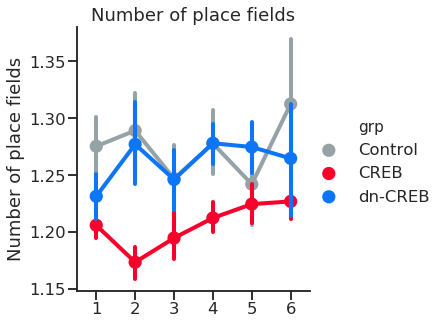

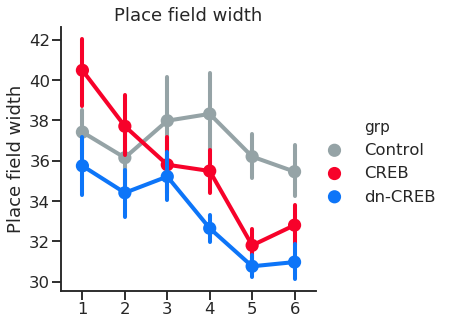

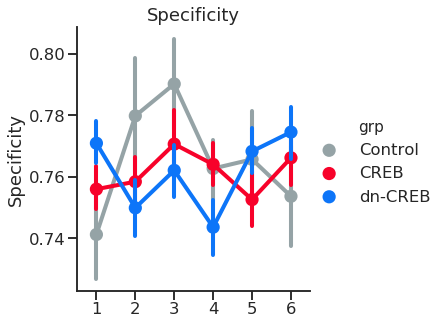

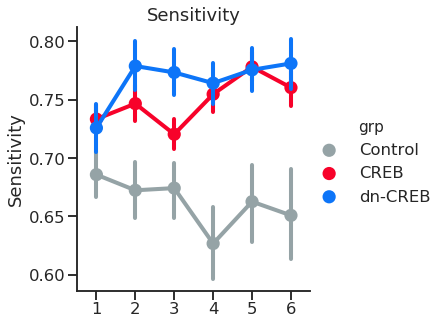

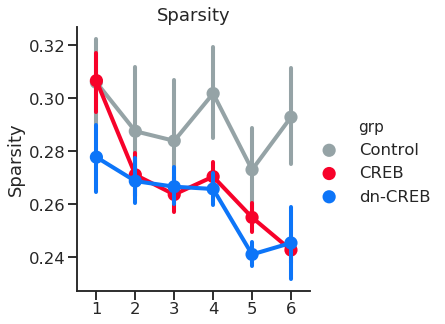

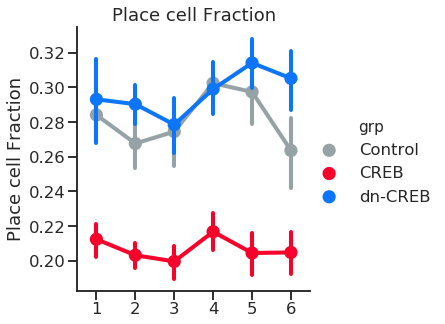

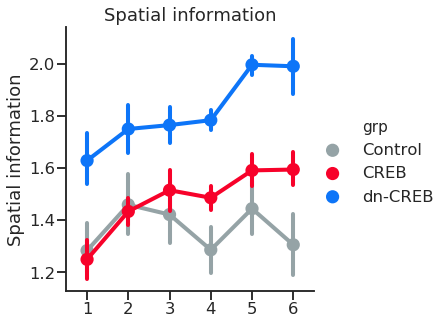

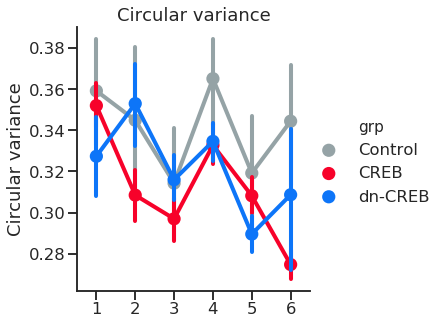

In [18]:

for key,label in zip(keys,activity_labels):
    
    ax = sns.catplot(x="day",y=key, hue='grp',
                kind="point",data=df,ci=68)
    
    ax.set(xlabel='', ylabel=label,title=label)
    #ax.set(xlabel='', ylabel=label,title=label)
    #ax.set_titles(col_template="lol", fontweight='bold', fontsize=18)


    sns.despine()

## boxplots

# Formula: n_place_fields~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.067    
Dependent Variable: n_place_fields   AIC:                -415.1531
Date:               2019-09-23 19:06 BIC:                -404.3913
No. Observations:   267              Log-Likelihood:     210.58   
Df Model:           2                F-statistic:        10.58    
Df Residuals:       264              Prob (F-statistic): 3.80e-05 
R-squared:          0.074            Scale:              0.012229 
------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
------------------------------------------------------------------
Intercept            1.2047   0.0111 108.3910 0.0000 1.1828 1.2266
C(grp)[T.Control]    0.0698   0.0163   4.2935 0.0000 0.0378 0.1018
C(grp)[T.dn-CREB]    0.0570   0.0166   3.4378 0.0007 0.0243 0.0896
--

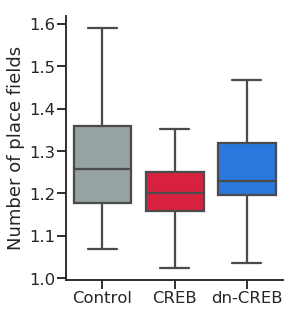

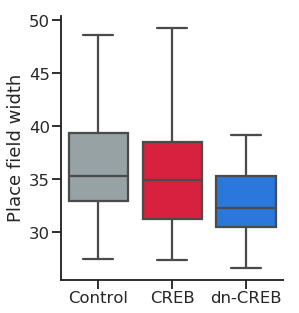

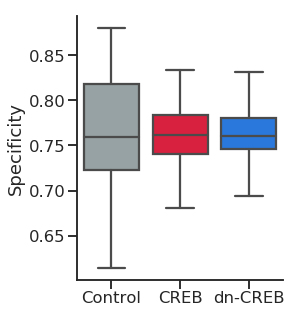

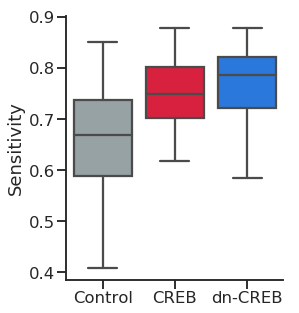

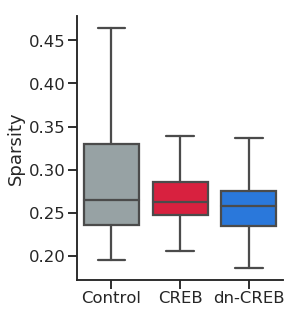

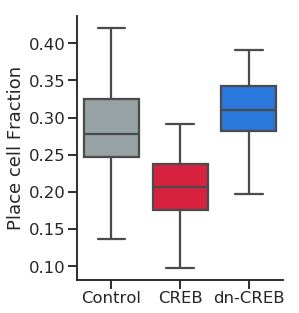

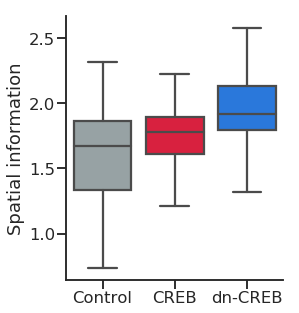

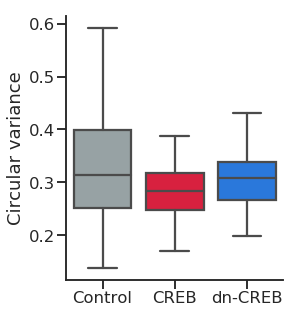

In [31]:
height,width = 5., 4.5


for key,label in zip(keys,activity_labels):
    
    #mdf = df.groupby(["grp","mouseID"]).mean().reset_index() #groupby mouse
    stats.full_anova(df,ind_vars=['grp'],dep_var=key)
    
    ax = sns.catplot(x="grp",y=key,
                kind="box",data=df,
                height=height, aspect=width/height,
                showfliers=False)
    
    ax.set(xlabel='', ylabel=label)
    #ax.set(ylim=(0,.9),ylabel=key_label,xlabel=' ')

    sns.despine()
    
    #stats.full_anova(df,ind_vars=['grp'],dep_var=key)
    
    
    #g.savefig('figs/popvec-overall-dpair-pcboth.svg')

# Formula: n_place_fields~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.109    
Dependent Variable: n_place_fields   AIC:                -38.6974 
Date:               2019-09-16 19:58 BIC:                -36.3796 
No. Observations:   16               Log-Likelihood:     22.349   
Df Model:           2                F-statistic:        1.921    
Df Residuals:       13               Prob (F-statistic): 0.186    
R-squared:          0.228            Scale:              0.0044102
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
Intercept            1.2009   0.0271 44.2950 0.0000  1.1423 1.2595
C(grp)[T.Control]    0.0760   0.0402  1.8888 0.0814 -0.0109 0.1628
C(grp)[T.dn-CREB]    0.0533   0.0402  1.3246 0.2081 -0.0336 0.1401
--

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


# Formula: specificity~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.152   
Dependent Variable: specificity      AIC:                -60.7213 
Date:               2019-09-16 19:58 BIC:                -58.4035 
No. Observations:   16               Log-Likelihood:     33.361   
Df Model:           2                F-statistic:        0.008257 
Df Residuals:       13               Prob (F-statistic): 0.992    
R-squared:          0.001            Scale:              0.0011134
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
Intercept            0.7608   0.0136 55.8480 0.0000  0.7314 0.7902
C(grp)[T.Control]    0.0025   0.0202  0.1245 0.9028 -0.0411 0.0462
C(grp)[T.dn-CREB]    0.0006   0.0202  0.0284 0.9778 -0.0431 0.0442
-----

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


# Formula: sparsity~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.049   
Dependent Variable: sparsity         AIC:                -53.4172 
Date:               2019-09-16 19:58 BIC:                -51.0994 
No. Observations:   16               Log-Likelihood:     29.709   
Df Model:           2                F-statistic:        0.6466   
Df Residuals:       13               Prob (F-statistic): 0.540    
R-squared:          0.090            Scale:              0.0017576
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
Intercept            0.2722   0.0171 15.9012 0.0000  0.2352 0.3091
C(grp)[T.Control]    0.0210   0.0254  0.8268 0.4233 -0.0339 0.0758
C(grp)[T.dn-CREB]   -0.0081   0.0254 -0.3197 0.7543 -0.0630 0.0467
--------

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


# Formula: spatial_information~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.342   
Dependent Variable: spatial_information AIC:                1.7526  
Date:               2019-09-16 19:58    BIC:                4.0704  
No. Observations:   16                  Log-Likelihood:     2.1237  
Df Model:           2                   F-statistic:        4.900   
Df Residuals:       13                  Prob (F-statistic): 0.0259  
R-squared:          0.430               Scale:              0.055260
--------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------
Intercept              1.4534   0.0960 15.1447 0.0000  1.2461 1.6608
C(grp)[T.Control]     -0.0969   0.1423 -0.6804 0.5082 -0.4044 0.2107
C(grp)[T.dn-CREB]      0.3434   0.1423 

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


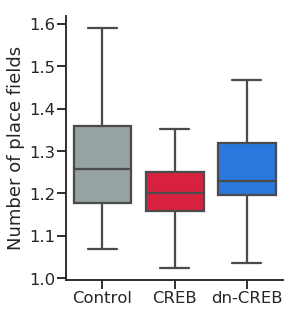

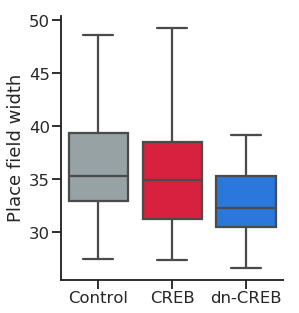

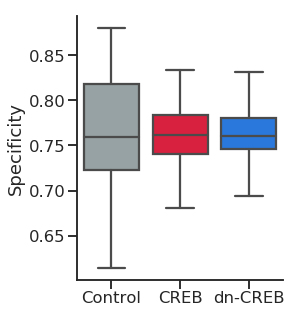

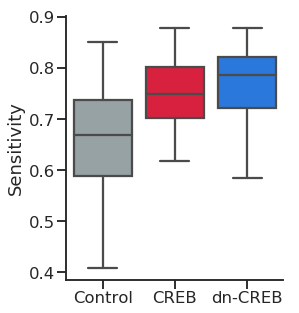

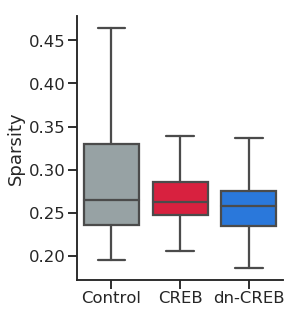

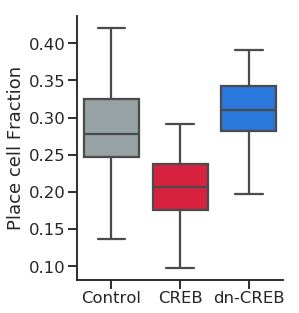

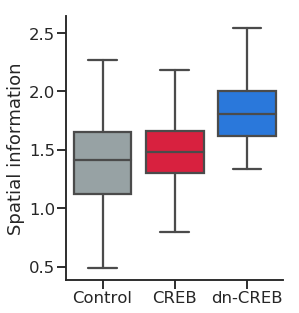

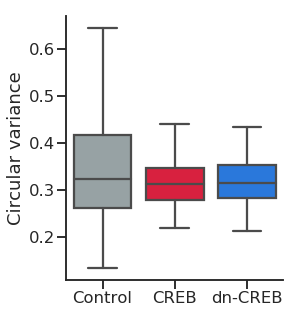

In [19]:
height,width = 5., 4.5


for key,label in zip(keys,activity_labels):
    
    #mdf = df.groupby(["grp","mouseID"]).mean().reset_index() #groupby mouse
    stats.full_anova(mdf,ind_vars=['grp'],dep_var=key)
    
    ax = sns.catplot(x="grp",y=key,
                kind="box",data=df,
                height=height, aspect=width/height,
                showfliers=False)
    
    ax.set(xlabel='', ylabel=label)
    #ax.set(ylim=(0,.9),ylabel=key_label,xlabel=' ')

    sns.despine()
    
    #stats.full_anova(df,ind_vars=['grp'],dep_var=key)
    
    
    #g.savefig('figs/popvec-overall-dpair-pcboth.svg')

# Formula: n_place_fields~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.109    
Dependent Variable: n_place_fields   AIC:                -38.6974 
Date:               2019-08-29 18:33 BIC:                -36.3796 
No. Observations:   16               Log-Likelihood:     22.349   
Df Model:           2                F-statistic:        1.921    
Df Residuals:       13               Prob (F-statistic): 0.186    
R-squared:          0.228            Scale:              0.0044102
------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------
Intercept            1.2009   0.0271 44.2950 0.0000  1.1423 1.2595
C(grp)[T.Control]    0.0760   0.0402  1.8888 0.0814 -0.0109 0.1628
C(grp)[T.dn-CREB]    0.0533   0.0402  1.3246 0.2081 -0.0336 0.1401
--

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


grp: CREB (36.571+-2.338, n=6) vs. dn-CREB (33.818+-1.416, n=5)
---------------------------------------------------------------
  Levene test for equal variance: W=1.17500, p=0.30656
  KS Normality test; CREB: D=0.25005, p=0.84731; dn-CREB: D=0.34317, p=0.50010
  Ttest_ind(t=0.95486, p=0.36459)
  Ks_2samp(D=0.33333, p=0.84705)

grp: Control (37.043+-2.335, n=5) vs. dn-CREB (33.818+-1.416, n=5)
------------------------------------------------------------------
  Levene test for equal variance: W=0.85865, p=0.38122
  KS Normality test; Control: D=0.22377, p=0.96372; dn-CREB: D=0.34317, p=0.50010
  Ttest_ind(t=1.18087, p=0.27157)
  Ks_2samp(D=0.60000, p=0.20898)

(CREB: 36.571 +- 2.338, n=6 mice; dn-CREB: 33.818 +- 1.416, n=5 mice; Control: 37.043 +- 2.335, n=5 mice)

0.0167
# Formula: specificity~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.152   
Dependent Variable: specif

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


# Formula: sensitivity~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.278    
Dependent Variable: sensitivity      AIC:                -40.7016 
Date:               2019-08-29 18:33 BIC:                -38.3838 
No. Observations:   16               Log-Likelihood:     23.351   
Df Model:           2                F-statistic:        3.882    
Df Residuals:       13               Prob (F-statistic): 0.0476   
R-squared:          0.374            Scale:              0.0038910
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept           0.7456   0.0255 29.2799 0.0000  0.6906  0.8006
C(grp)[T.Control]  -0.0835   0.0378 -2.2110 0.0456 -0.1651 -0.0019
C(grp)[T.dn-CREB]   0.0191   0.0378  0.5056 0.6216 -0.0625  0.1007
-----

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


-------------------------------------------------------------
  Levene test for equal variance: W=0.82470, p=0.38748
  KS Normality test; CREB: D=0.26049, p=0.81023; dn-CREB: D=0.25326, p=0.90551
  Ttest_ind(t=0.55828, p=0.59027)
  Ks_2samp(D=0.40000, p=0.65208)

grp: Control (0.293+-0.030, n=5) vs. dn-CREB (0.264+-0.010, n=5)
----------------------------------------------------------------
  Levene test for equal variance: W=1.23704, p=0.29835
  KS Normality test; Control: D=0.32345, p=0.58161; dn-CREB: D=0.25326, p=0.90551
  Ttest_ind(t=0.93191, p=0.37865)
  Ks_2samp(D=0.40000, p=0.69740)

(Control: 0.293 +- 0.030, n=5 mice; dn-CREB: 0.264 +- 0.010, n=5 mice; CREB: 0.272 +- 0.011, n=6 mice)

0.0167
# Formula: pc_percentage~C(grp)
# grp: set(['Control', 'CREB', 'dn-CREB'])

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.332    
Dependent Variable: pc_percentage    AIC:                -49.2096 
Date:               2019-08-29

/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/home/matt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))




grp: CREB (0.313+-0.005, n=6) vs. dn-CREB (0.319+-0.015, n=5)
-------------------------------------------------------------
  Levene test for equal variance: W=2.75018, p=0.13162
  KS Normality test; CREB: D=0.15322, p=0.99895; dn-CREB: D=0.26471, p=0.87482
  Ttest_ind(t=-0.43042, p=0.67701)
  Ks_2samp(D=0.40000, p=0.65208)

grp: Control (0.345+-0.039, n=5) vs. dn-CREB (0.319+-0.015, n=5)
----------------------------------------------------------------
  Levene test for equal variance: W=2.05598, p=0.18952
  KS Normality test; Control: D=0.25576, p=0.89917; dn-CREB: D=0.26471, p=0.87482
  Ttest_ind(t=0.60348, p=0.56290)
  Ks_2samp(D=0.40000, p=0.69740)

(CREB: 0.313 +- 0.005, n=6 mice; dn-CREB: 0.319 +- 0.015, n=5 mice; Control: 0.345 +- 0.039, n=5 mice)

0.0167


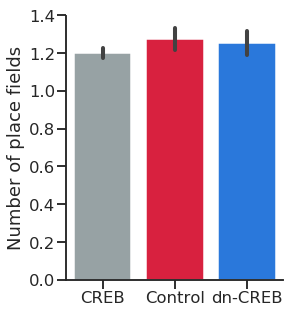

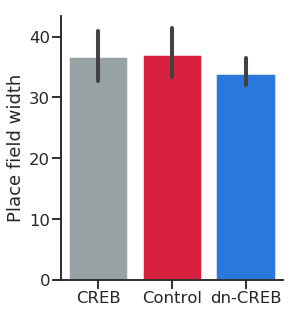

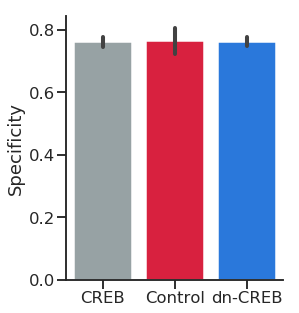

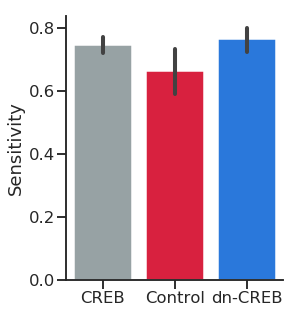

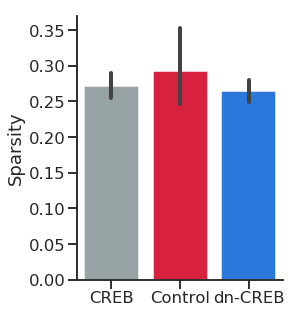

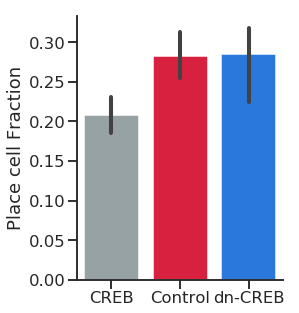

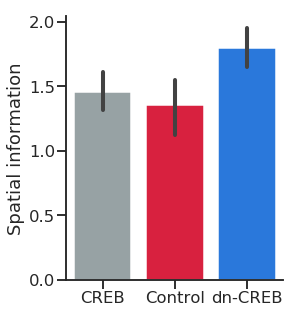

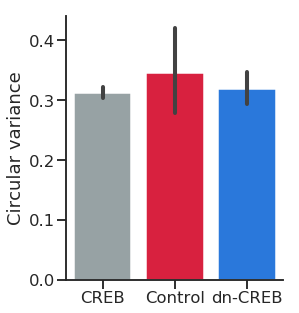

In [367]:
height,width = 5., 4.5


for key,label in zip(keys,activity_labels):
    
    mdf = df.groupby(["grp","mouseID"]).mean().reset_index()
    stats.full_anova(mdf,ind_vars=['grp'],dep_var=key)
    
    ax = sns.catplot(x="grp",y=key,
                kind="bar",data=mdf,
                height=height, aspect=width/height)
                #showfliers=False)
    
    ax.set(xlabel='', ylabel=label)
    #ax.set(ylim=(0,.9),ylabel=key_label,xlabel=' ')

    sns.despine()
    
    #stats.full_anova(df,ind_vars=['grp'],dep_var=key)
    
    
    #g.savefig('figs/popvec-overall-dpair-pcboth.svg')

# place and activity scatter

In [5]:
mdf = mjdplot.merge_pairs(df_place,df_activity)

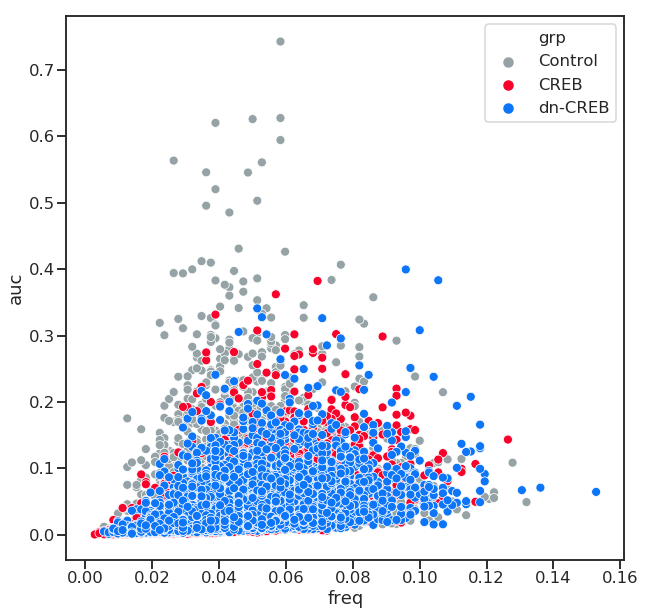

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='freq',y='auc',hue='grp',data=mdf)

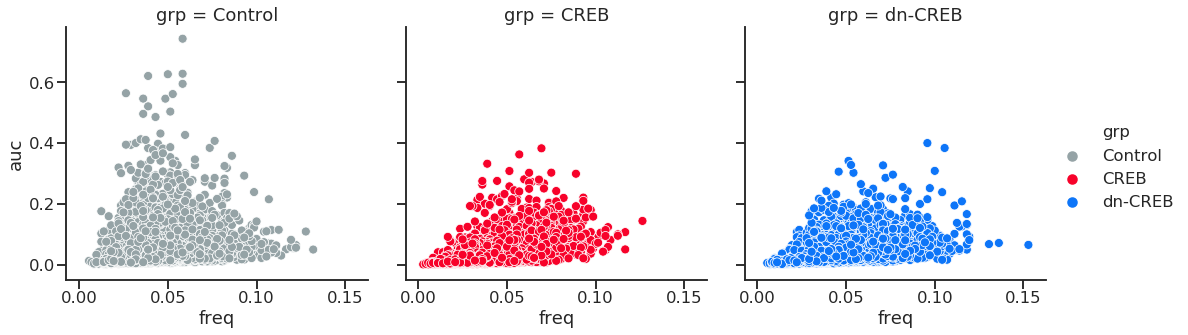

In [12]:

sns.relplot(x="freq", y='auc',col='grp', hue='grp',kind="scatter",data=mdf)

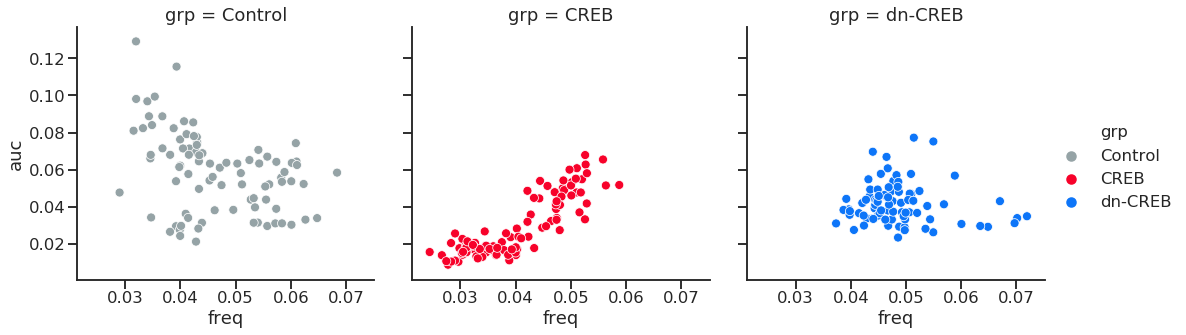

In [28]:
# aggregate by mean with categorical/string
agg_df= mdf.groupby(['trial_id','grp'],as_index=False).agg({'auc':'mean','freq':'mean'})
agg_df=mjd.sort_df_by_group(agg_df)
sns.relplot(x="freq", y='auc',col='grp', hue='grp',kind="scatter",data=agg_df)

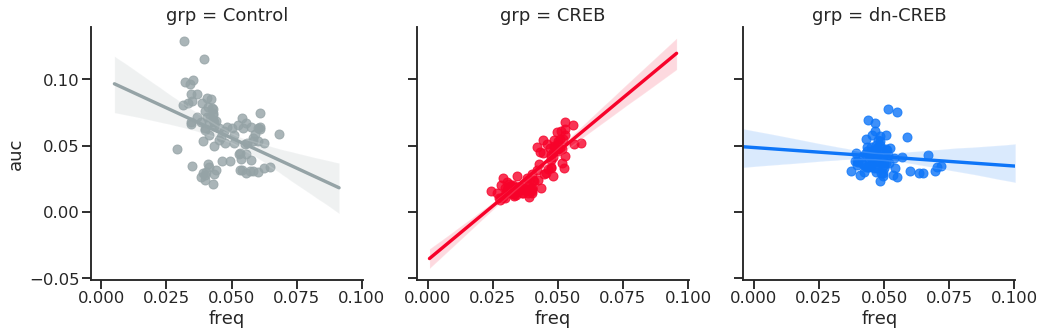

In [30]:
#plt.figure(figsize=(10,10))
#sns.set_context("paper")
sns.lmplot(x="freq", y="auc", col="grp",hue="grp", data=agg_df);

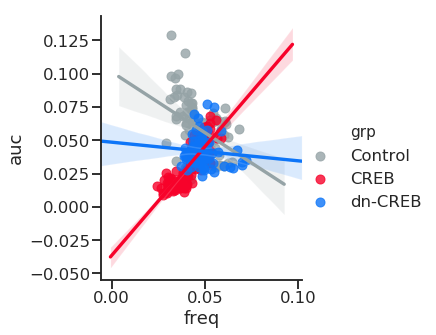

In [31]:
sns.lmplot(x="freq", y="auc", hue="grp", data=agg_df);

# linear regression

In [41]:
from scipy.stats import spearmanr, pearsonr, linregress

for n,g in agg_df.groupby("grp"):
    r,p = pearsonr(g.auc,g.freq) 
    print(n,round(r,4),round(p,4))
print(" ")
for n,g in agg_df.groupby("grp"):
    r,p = spearmanr(g.auc,g.freq) 
    print(n,round(r,4),round(p,4))   

('Control', -0.3949, 0.0001)
('CREB', 0.8573, 0.0)
('dn-CREB', -0.0905, 0.4216)
 
('Control', -0.3946, 0.0001)
('CREB', 0.8176, 0.0)
('dn-CREB', -0.0771, 0.4941)


In [43]:
# non aggregate
for n,g in mdf.groupby("grp"):
    r,p = pearsonr(g.auc,g.freq) 
    print(n,round(r,4),round(p,4))
    
print(" ")
for n,g in mdf.groupby("grp"):
    r,p = spearmanr(g.auc,g.freq) 
    print(n,round(r,4),round(p,4))   

('CREB', 0.549, 0.0)
('Control', 0.161, 0.0)
('dn-CREB', 0.395, 0.0)
 
('CREB', 0.6878, 0.0)
('Control', 0.3269, 0.0)
('dn-CREB', 0.4843, 0.0)


# PAIR PLOT tests

In [38]:
list(mdf.columns)

dvars= ['n_pfs',
         'width',
         'specificity',
         'sensitivity',
         'sparsity',
         'place',
         'auc',
         'freq'
        ]mjd.sort_df_by_group(agg_df)

mdfv=mdf.loc[:,dvars]

<Figure size 2160x2160 with 0 Axes>

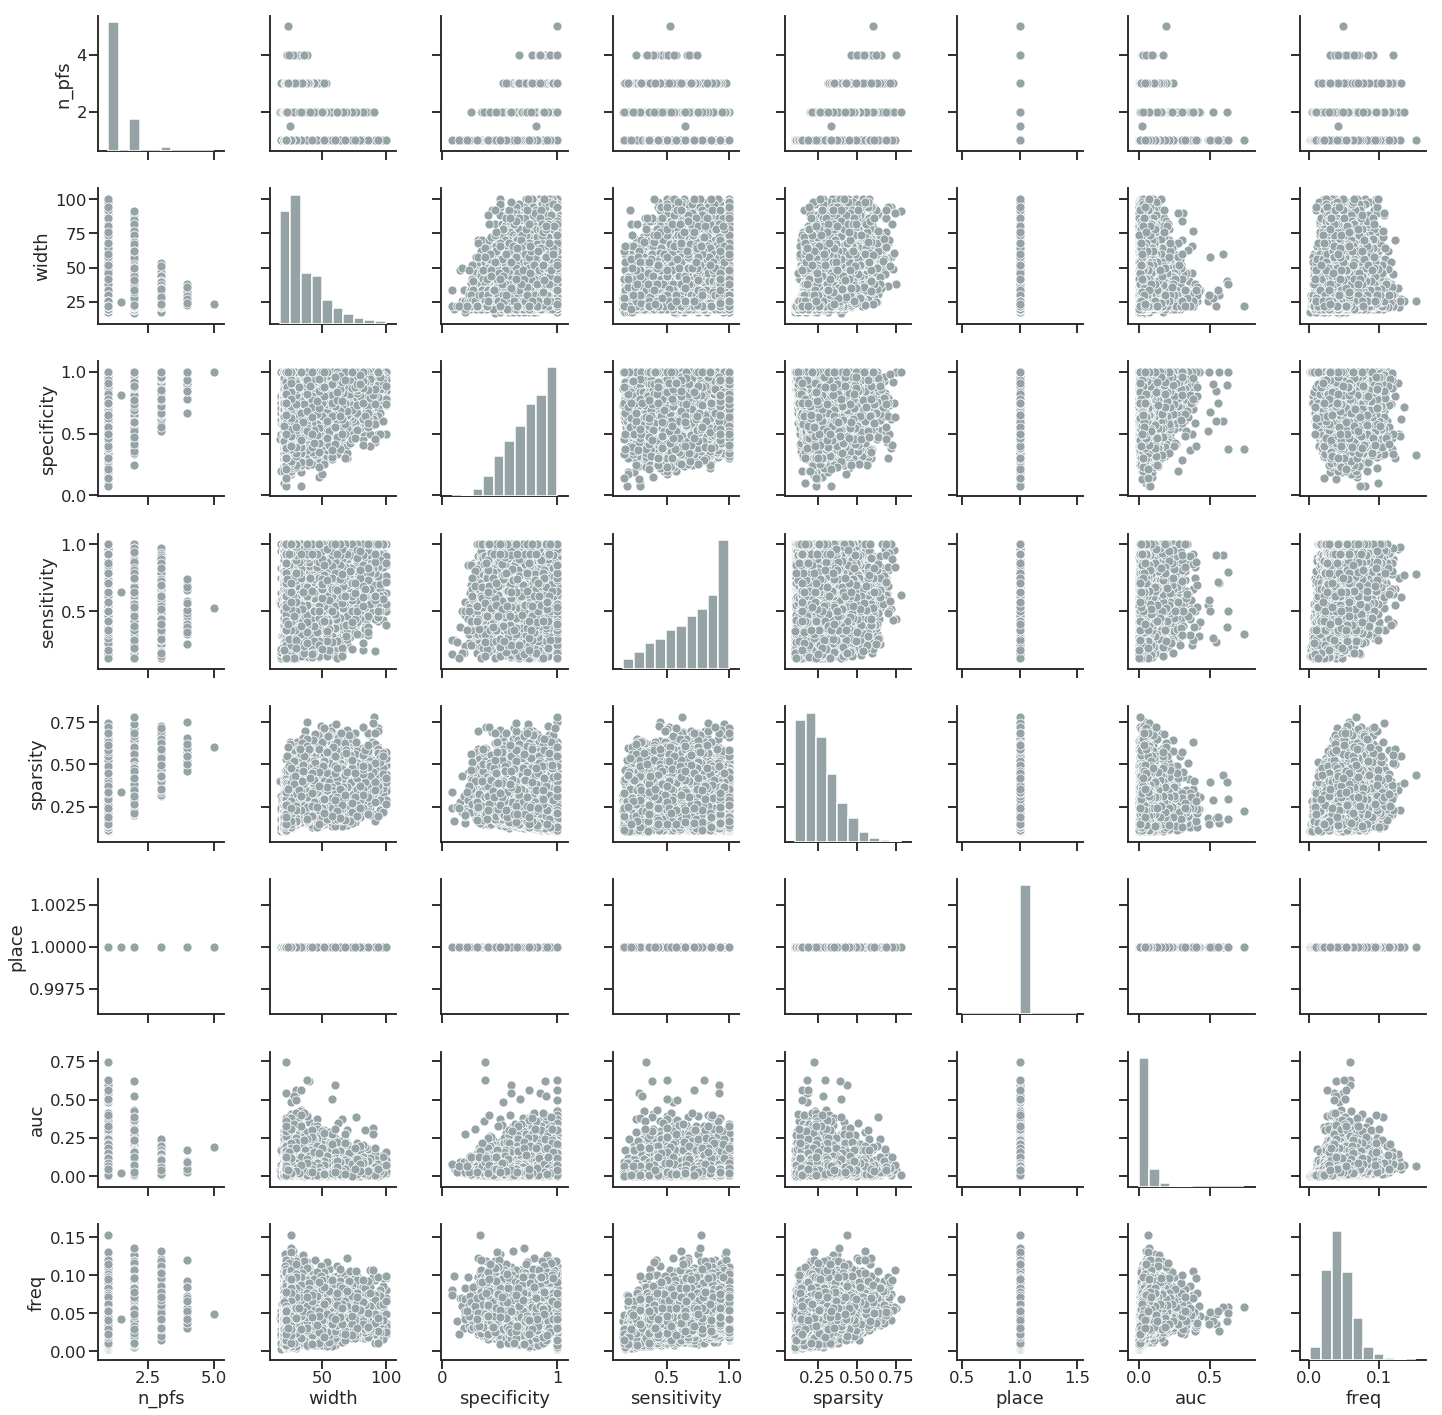

In [32]:
plt.figure(figsize=(30,30))

sns.pairpolot(mdfv)

<Figure size 2160x2160 with 0 Axes>

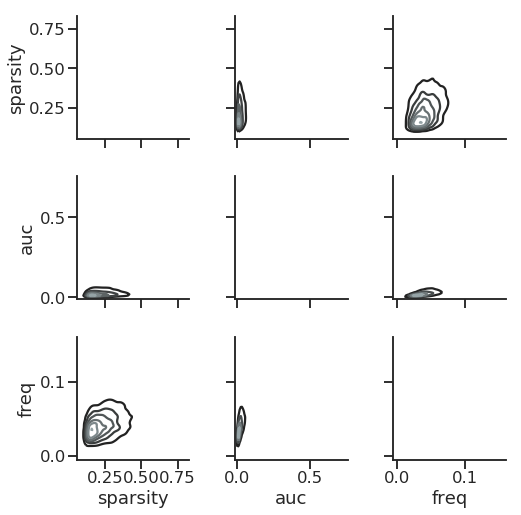

In [37]:
plt.figure(figsize=(30,30))

g = sns.PairGrid(mdfv)

#g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

<Figure size 720x720 with 0 Axes>

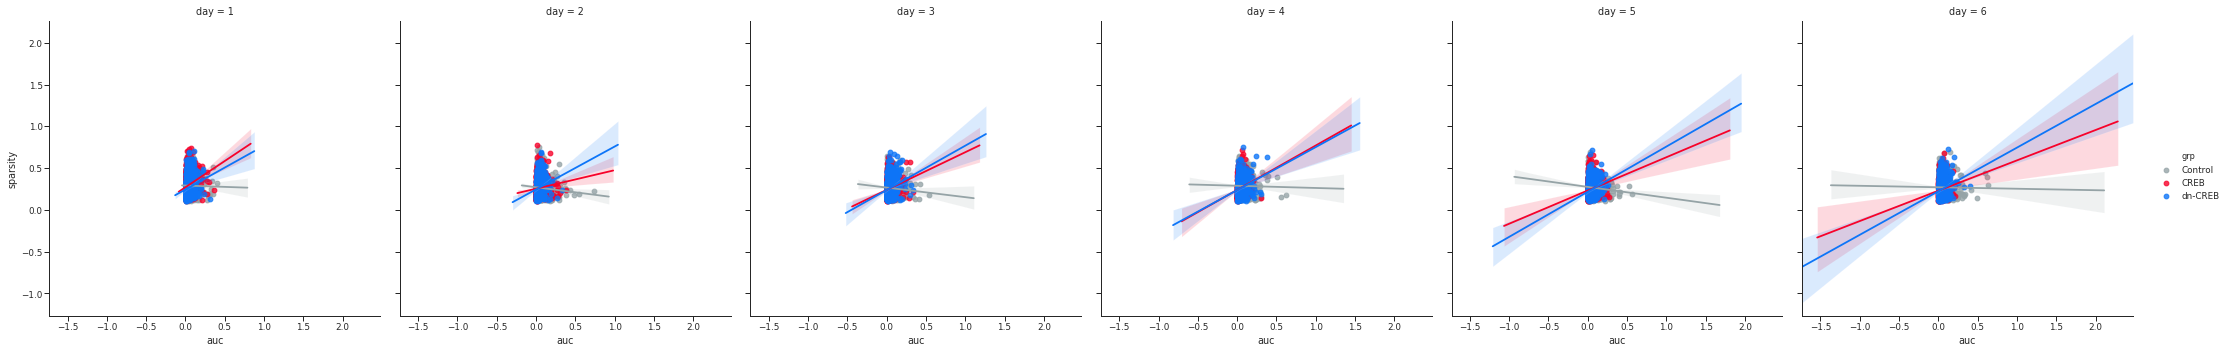

In [48]:
plt.figure(figsize=(10,10))
sns.set_context("paper")
sns.lmplot(x="auc", y="sparsity", col="day",hue="grp", data=mdf);